# Introduction to pandas

* **pandas** is a Python package providing convenient data structures to work with labelled data.

* **pandas** is perfectly suited for observational / statistical data sets, having many similarities with Excel spreadsheets.

* Key features:

    - easy handling of **missing data**
    - **size mutability**: columns can be inserted and deleted from DataFrame
    - automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
    - powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets
    - make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
    - intelligent label-based **slicing**, **fancy indexing**, and **subsetting** of large data sets
    - intuitive **merging** and **joining** data sets
    - flexible **reshaping** and pivoting of data sets
    - **hierarchical** labeling of axes (possible to have multiple labels per tick)
    - robust IO tools for loading data from **flat files** (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
    - **time series**-specific functionality

### Primary data structures of pandas
* **Series** (1-dimensional)
* **DataFrame** (2-dimensional)

pandas is built on top of **NumPy** and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

## Loading data

* In this session, we will use observations of the air quality as an example
* The data have been collected **hourly** from one of the monitoring sites in London (Marleybone Road) **over the year 2015**
* Measured are: ozone ($O_3$), nitrogen oxides (NOx), carbon monoxide (CO) and PM10 particulate matter

First, we import pandas module. We use an alias "pd" to write code quicker.

In [32]:
import pandas as pd
%matplotlib inline

In [46]:
dparser = lambda d, t: pd.datetime.strptime(d+t, '%d.%m.%y%H:%M')

In [77]:
# df = pd.read_csv("../data/NH_seaice_extent_final_v2.csv", skiprows=[1], header=0, parse_dates=[0,1,2])
df = pd.read_csv("../data/kronotskoe.txt", parse_dates={'time': [0, 1]}, date_parser=dparser,
                 header=0, skiprows=1,
                 sep='\t', na_values='---',
                 )
print(df.columns)
df.head()

Index(['time', 'Out', 'Temp', 'Temp.1', 'Hum', 'Pt.', 'Speed', 'Dir', 'Run',
       'Speed.1', 'Dir.1', 'Chill', 'Index', 'Index.1', 'Index.2', 'Bar  ',
       'Rain', 'Rate', 'Rad.', 'Energy', 'Rad. ', 'Index.3', 'Dose', 'UV ',
       'D-D ', 'D-D .1', 'Temp.2', 'Hum.1', 'Dew', 'Heat', 'EMC', 'Density',
       'ET ', 'Samp', 'Tx ', 'Recept', 'Int.'],
      dtype='object')


,time,Out,Temp,Temp.1,Hum,Pt.,Speed,Dir,Run,Speed.1,...,Hum.1,Dew,Heat,EMC,Density,ET,Samp,Tx,Recept,Int.
0,2011-07-11 20:05:00,18.6,18.6,18.5,86,16.2,0.0,NaN,0.00,0.0,...,78,15.3,19.8,15.61,1.1846,0.0,40,1,35.1,5
1,2011-07-11 20:10:00,18.7,18.7,18.6,86,16.3,0.0,NaN,0.00,0.0,...,77,15.3,19.9,15.19,1.1840,0.0,117,1,100.0,5
2,2011-07-11 20:15:00,18.7,18.7,18.7,86,16.3,0.0,NaN,0.00,0.0,...,77,15.4,20.1,15.17,1.1835,0.0,117,1,100.0,5
3,2011-07-11 20:20:00,17.8,18.8,17.8,72,12.7,0.9,NNE,0.27,2.2,...,76,15.4,20.2,14.80,1.1830,0.0,117,1,100.0,5
4,2011-07-11 20:25:00,16.0,17.7,16.0,77,12.0,0.9,NNE,0.27,1.8,...,75,15.3,20.3,14.45,1.1828,0.0,117,1,100.0,5


In [106]:
df.head().T

,0,1,2,3,4
time,2011-07-11 20:05:00,2011-07-11 20:10:00,2011-07-11 20:15:00,2011-07-11 20:20:00,2011-07-11 20:25:00
Out,18.6,18.7,18.7,17.8,16
Temp,18.6,18.7,18.7,18.8,17.7
Temp.1,18.5,18.6,18.7,17.8,16
Hum,86,86,86,72,77
Pt.,16.2,16.3,16.3,12.7,12
Speed,0,0,0,0.9,0.9
Dir,NaN,NaN,NaN,NNE,NNE
Run,0,0,0,0.27,0.27
Speed.1,0,0,0,2.2,1.8


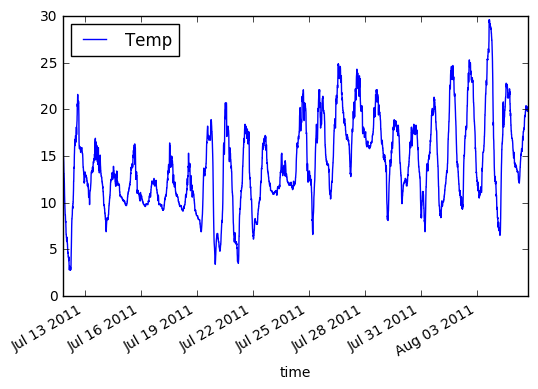

In [80]:
df.plot('time', 'Temp')

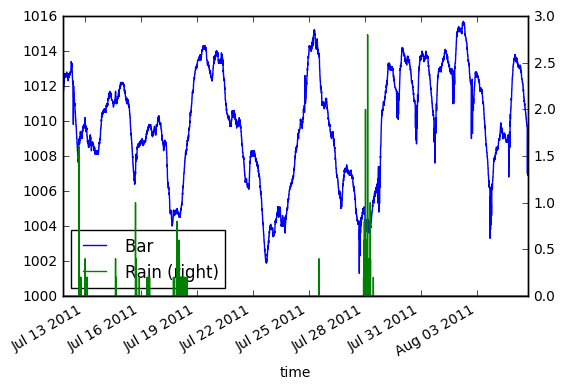

In [96]:
ax = df.plot('time', 'Bar  ')
df.plot('time', 'Rain', ax=ax, secondary_y=True)

In [98]:
df.columns = [i.replace(' ', '') for i in df.columns]

We also import the `os` module that is useful for building paths to files (among many other things). And `numpy` with `matplotlib` just in case too.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = os.path.join(os.path.pardir, 'data')
fname = os.path.join(data_path, 'air_quality_hourly_london_marylebone.csv')

Let's try to read the data using `pandas.read_csv()` function.

In [ ]:
# minimal setup to read the given file
air_quality = pd.read_csv(fname, header=4, skipfooter=4, na_values='No data', engine='python')

**Q**: What happens if you remove the header? skipfooter? engine?

## Data structures: `DataFrame` and `Series`

Let's interrogate the `DataFrame` object!

In [ ]:
type(air_quality)

In [ ]:
# Internal nature of the object
print(air_quality.shape)
print()
print(air_quality.dtypes)

In [ ]:
# View just the tip of data
air_quality.head()

**Q:** What did you notice about "Status" columns? Compare them to the original text file.

In [ ]:
# View the last rows of data
air_quality.tail(n=2)  # Note the optional argument (available for head() too)

Get descriptors for the **vertical** axis (axis=0):

In [ ]:
air_quality.index

Get descriptors for the horizontal axis (axis=1):

In [ ]:
air_quality.columns

A lot of information at once including memory usage:

In [ ]:
air_quality.info()

### Series, pandas' 1D data containter

A series can be constructed with the `pd.Series` constructor (passing an array of values) or from a `DataFrame`, by extracting one of its columns.

In [ ]:
carbon_monoxide = air_quality['Carbon monoxide']

Some of its attributes:

In [ ]:
print(type(carbon_monoxide))
print(carbon_monoxide.dtype)
print(carbon_monoxide.shape)
print(carbon_monoxide.nbytes)

Show me what you got! <img src=https://staticdelivery.nexusmods.com/mods/1151/images/543-1-1447533110.png style="width:40px;">

In [ ]:
carbon_monoxide

### Numpy as pandas's backend

It is always possible to fall back to a good old NumPy array to pass on to scientific libraries that need them: SciPy, scikit-learn, etc

In [ ]:
air_quality['Nitrogen oxides as nitrogen dioxide'].values

In [ ]:
type(air_quality['Nitrogen oxides as nitrogen dioxide'].values)

## Creating DataFrames

* `DataFrame` can also be created manually, by grouping several `Series` together.
* Let's make a new frame from the data we already have

In [ ]:
NOx = air_quality['Nitrogen oxides as nitrogen dioxide']
ozone = air_quality.Ozone

In [ ]:
new_df = pd.DataFrame({'O3_conc': ozone,
                       'NOx_conc': NOx,
                       'Date': air_quality['Start date']})

In [ ]:
new_df.head()

## Cleaning data

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">The truth about data science: cleaning your data is 90% of the work. Fitting the model is easy. Interpreting the results is the other 90%.</p>&mdash; Jake VanderPlas (@jakevdp) <a href="https://twitter.com/jakevdp/status/742406386525446144">June 13, 2016</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

### Dealing with dates and times

In [ ]:
# def dateparse(date_str, time_str):
#     diff = pd.to_timedelta((df['End Date'] == '24:00:00').astype(int), unit='d')
#     pd.datetime.strptime(x+y, '%Y-%m-%d%H:%M:%S') 

In [ ]:
air_quality = pd.read_csv(fname, header=4, skipfooter=4, na_values='No data', engine='python',
                          parse_dates={'Time': [0, 1]})

### Renaming columns

In [ ]:
air_quality.columns = ['Time', 'O3', 'O3_status', 'NOx', 'NOx_status',
                       'CO', 'CO_status', 'PM10', 'PM10_status', 'Co', 'Co_status']
air_quality.columns

### Deleting columns

Let us concentrate our attention on the first 4 chemical species, and remove cobalt data from our `DataFrame`:

In [ ]:
air_quality = air_quality.drop('Co', 1)
air_quality = air_quality.drop('Co_status', 1)

In [ ]:
air_quality.head()

## Basic visualisation

### Exercise

Try calling `plot()` method of the `air_quality` object:

In [ ]:
# air_quality.plot()

What happens if put `subplots=True` as an argument of the `plot()` method?

In [ ]:
# air_quality.plot( ... )

It is easy to create other useful plots using `DataFrame`:

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
air_quality.boxplot(ax=ax0, column=['O3', 'PM10'])
air_quality.O3.plot(ax=ax1, kind="kde")

As well as just a simple line plot:

In [ ]:
air_quality.O3.plot(grid=True, figsize=(12, 2))

### Setting missing values

As you may notice, we have negative values of ozone concentration, which does not make sense. So, let us replace those negative values with NaN:

In [ ]:
air_quality[air_quality.O3.values < 0]

We can mask them out in the same way as you do with numpy arrays:

In [ ]:
# Replace negative ozone values with NaN
air_quality.O3[air_quality.O3.values < 0] = np.nan

## Saving data

For each `read_**` function to load data, there is a `to_**` method attached to `Series` and `DataFrames`.

#### Excel spreadsheets

Uncomment the following code cell and run to save the whole `DataFrame` to an Excel file.

In [ ]:
# with pd.ExcelWriter("test.xls") as our_writer:
#     air_quality.to_excel(writer, sheet_name='Blah-blah')

#### Exercise: writing to CSV text files

Find a method to save `DataFrames` to a text file (or whatever format you like more).

In [ ]:
# Your code here

## Some statistics

In [ ]:
air_quality.describe()

## Correlations and regressions

* Is there correlations between the timeseries we loaded?
* First, let's take a glance at the whole `DataFrame` using a fancy `scatter_matrix` function.

In [ ]:
from pandas.tools.plotting import scatter_matrix

In [ ]:
with plt.style.context('ggplot'):
    scatter_matrix(air_quality, figsize=(7, 7))

## Computing correlations

Both `Series` and `DataFrames` have a **`corr()`** method to compute the correlation coefficient.

In [ ]:
air_quality.NOx.corr(air_quality['CO'])

If series are already grouped into a `DataFrame`, computing all correlation coefficients is trivial:

In [ ]:
air_quality.corr()

If you want to visualise this correlation matrix, uncomment the following code cell.

In [ ]:
# fig, ax = plt.subplots()
# p = ax.imshow(air_quality.corr(), interpolation="nearest", cmap='RdBu_r', vmin=-1, vmax=1)
# ax.set_xticks(np.arange(len(air_quality.corr().columns)))
# ax.set_yticks(np.arange(len(air_quality.corr().index)))
# ax.set_xticklabels(air_quality.corr().columns)
# ax.set_yticklabels(air_quality.corr().index)
# fig.colorbar(p)

### Ordinary Least Square (OLS) regressions 

<img src=http://statsmodels.sourceforge.net/devel/_static/statsmodels_hybi_banner.png>

The recommeded way to build ordinaty least square regressions is by using `statsmodels`.

In [97]:
import statsmodels.formula.api as sm

In [120]:
sm_model = sm.ols(formula="Ch ~ Bar", data=df).fit()

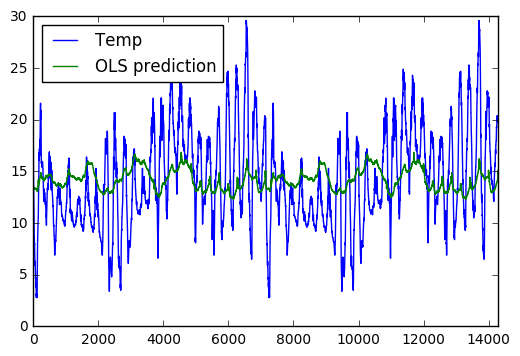

In [121]:
df.Temp.plot()
ax = sm_model.fittedvalues.plot(label="OLS prediction")
ax.legend(loc="upper left")

## Exercise: rolling functions

In [ ]:
# with plt.style.context('ggplot'):
#     air_quality.NOx[:24*10].plot()
#     rolled_series = air_quality.NOx[:24*10].rolling(window=10, center=False)
#     # print(rolled_series)
#     rolled_series.median().plot(lw=2)

## References
* https://github.com/jonathanrocher/pandas_tutorial
* http://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas
* http://pandas.pydata.org/pandas-docs/stable/10min.html

* Data source: https://uk-air.defra.gov.uk/data/
* Site description: https://uk-air.defra.gov.uk/networks/site-info?uka_id=UKA00315